# feature scaling


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

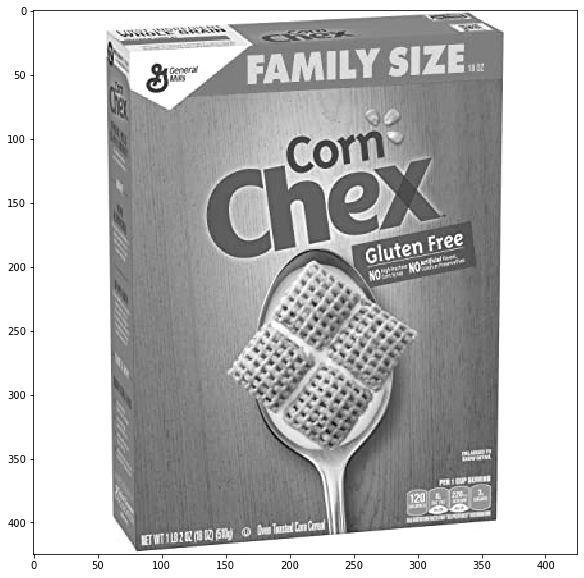

In [3]:
reeses=cv2.imread('chex.jpg',0)
display(reeses)

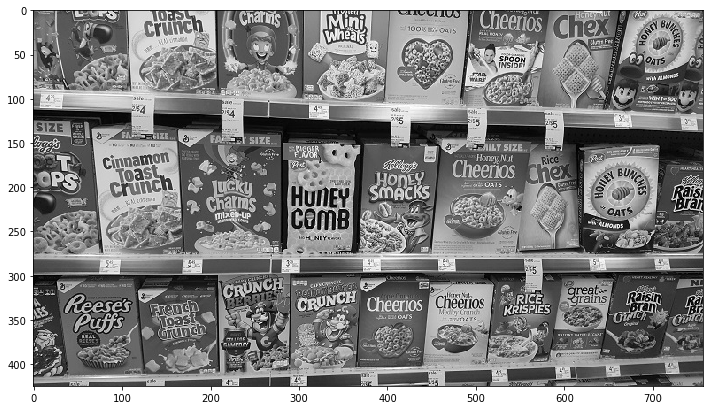

In [7]:
cereals=cv2.imread('cerialale.jpg',0)
display(cereals)

In [19]:
orb=cv2.ORB_create()


In [20]:
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)



In [21]:
#matching objects creating 

#brute force 
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [22]:
matches=bf.match(des1,des2)
#matches distance attrinute show the best match long distance shoe perfect math while small destance show imperfect matches


In [23]:
matches=sorted(matches,key=lambda x:x.distance)
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

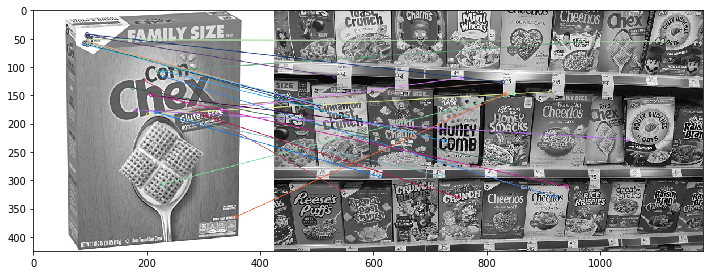

In [24]:
display(reeses_matches)

In [25]:
#SHIFTbased matcher
#scale in variance feature transform

sift=cv2.xfeatures2d.SIFT_create()


error: OpenCV(4.1.0) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [ ]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

bf=cv2.BFMatcher()

matches=bf.knnMatch(des1,des2,k=2)

#matches looks like a pair 


#ratio match 
good=[]
for match1,match2 in matches:
    #if the macth 1 distane is less then 75% of match2 distance 
    #then descriptor was a good match lets keep it 
    if match1.distance <0.75*match2.distance:
        good.append([match1])

sift_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

display(sift_matches)


In [ ]:
#FLANN BAsed Matcher 
#itfind general good matches and not the best mathces


sift =cv2.cfeatures2d.SIFT_create()

kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

FLANN_INDEX_KDTREE=0
index_params=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)

search_params=dict(checks=50)(checks=50)

flann=cv2.flannBasedMatcher(imdex_params,search_params)

matches=flann.knnMatch(des1,des2,k=2)

#matchesMask=[[0,0] for i in range(len(matches))] this is step 2# do it after completing all like shift matches


good=[]
for match1,match2 in matches:
    if match1.distance <0.7*match2.distance:
        #this is step-2
        #matchesMask[i]=[1,0] this step 2or good.append([match1])
        good.append([match1])
        
#this is step-2
#draw_params=dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matchesMask,**draw_params)
#flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,flags=2)
#display(flann_matches) 
    
flann_matches=cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(flann_matches)

In [18]:
!pip3 install opencv-contrib-python==3.4.2.16

  Could not find a version that satisfies the requirement opencv-contrib-python==3.4.2.16 (from versions: 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 4.0.0.21, 4.0.1.23, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34)
No matching distribution found for opencv-contrib-python==3.4.2.16
